In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import numpy as np


# cargar el conjunto de datos de los lirios
iris = load_iris()

# Tomar solo las primeras dos características para la visualización
X = iris.data[:, 2:4]
y = iris.target

# Dividir los datos en conjuntos de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.concatenate((X[0:25], X[50:75], X[100:125]))
y_train=np.concatenate((y[0:25], y[50:75], y[100:125]))

X_test=np.concatenate((X[25:50], X[75:100], X[125:150]))
y_test=np.concatenate((y[25:50], y[75:100], y[125:150]))

# Inicializar el clasificador Naive Bayes
naive_bayes = GaussianNB()

# Entrenar el modelo de Naive Bayes
naive_bayes.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = naive_bayes.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.9733333333333334


Matriz de confusión:
[[25  0  0]
 [ 0 24  1]
 [ 0  1 24]]


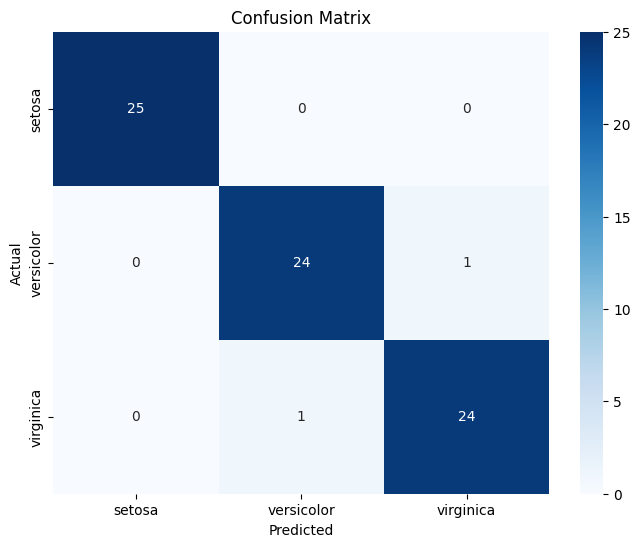

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix


# Construir la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculando curva ROC entre Versicolor y Virginica
vp=0
fp=0
vn=0
fn=0
vpr1 = 0
fpr1 = 0

tpr = [0] * 50
fpr = [0]* 50


for i in range(25, 75):
    tpr[i-25]=vpr1
    fpr[i-25]=fpr1
    if y_pred[i] == 1 and y_test[i] == 1:
        vp += 1
    if y_pred[i] == 2 and y_test[i] == 2:
        vn += 1
    if y_pred[i] == 2 and y_test[i] == 1:
        fp += 1
    if y_pred[i] == 1 and y_test[i] == 2:
        fn += 1
    #print(f"VP: {vp}, FP: {fp}, FN: {fn}, VN: {vn}")

    if (vp + fn)!=0:
      vpr1 = vp/(vp + fn)


    if (fp + vn)!=0:
      fpr1 = fp/(fp + vn)


fpr=np.round(fpr, 2)


tpr = np.sort(tpr)
fpr = np.sort(fpr)

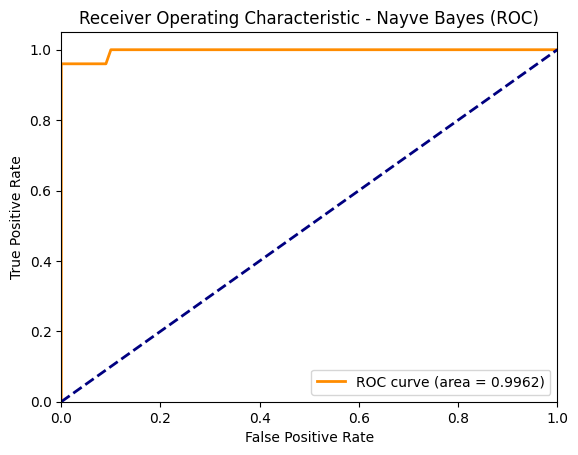

In [ ]:
# Graficar la curva ROC
from sklearn.metrics import roc_curve, auc

roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Nayve Bayes (ROC)')
plt.legend(loc="lower right")
plt.show()